In [30]:
import mlflow
mlflow.set_tracking_uri("http://0.0.0.0:5000")

import matplotlib.pyplot as plt
import numpy as np

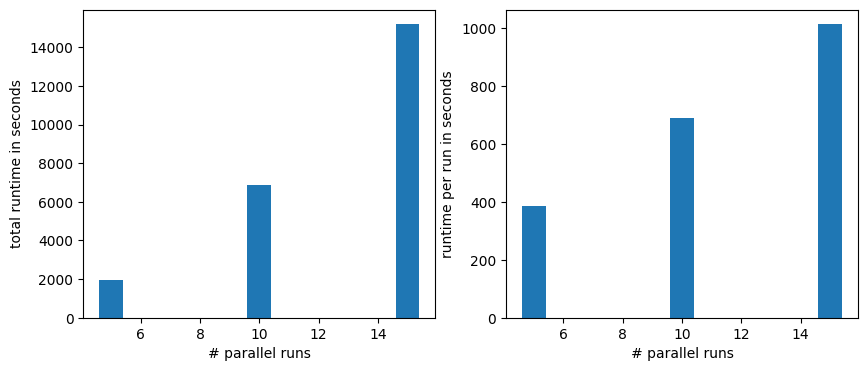

In [34]:
# RUNTIME OVER NUMBER OF RUNS IN PARALLEL

runs_df = mlflow.search_runs(
    filter_string="attributes.status = 'FINISHED'",
    order_by=["params.runs_per_iteration DESC"],
    output_format="pandas")

xs = runs_df["params.runs_per_iteration"].unique().astype(int)
np.sort(xs)

runs_df["run_time"] = ((runs_df["end_time"] - runs_df["start_time"])).dt.total_seconds()
ys = [sum([row.run_time for row in runs_df[runs_df['params.runs_per_iteration'].astype(int) == x].itertuples()]) for x in xs]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.bar(xs, ys)
ax1.set_ylabel("total runtime in seconds")
ax1.set_xlabel("# parallel runs")

ax2.bar(xs, ys / xs.astype(int))
ax2.set_ylabel("runtime per run in seconds")
ax2.set_xlabel("# parallel runs")

plt.show()

In [14]:
print(xs)

['5' '10']
